In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random as rd

In [2]:
# sample dataset
genes = [f'gene{i}' for i in range(1, 101)]

In [3]:
wt = [f'wt{i}' for i in range(1, 6)]
ko = [f'ko{i}' for i in range(1,6)]

In [15]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000),size=5)

In [6]:
scaled_data = preprocessing.scale(data.T) # StandardScaler().fit_transform(data.T)

In [7]:
pca = PCA()

In [8]:
pca.fit(scaled_data)

PCA()

In [9]:
pca_data = pca.transform(scaled_data)

In [10]:
# select principal components
percentage_variation = np.round(pca.explained_variance_ratio_*100, decimals=1)

In [11]:
labels = [f'PCA{i}' for i in range(1, len(percentage_variation)+1)]

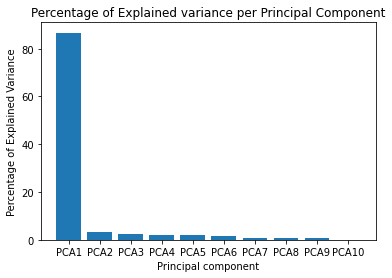

In [12]:
plt.bar(x=range(1, len(percentage_variation)+1), height=percentage_variation, tick_label=labels)
plt.xlabel('Principal component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Percentage of Explained variance per Principal Component')
plt.show()

In [13]:
explained_variance_table = pd.DataFrame(np.array([percentage_variation]).T, index=labels, columns=[ 'ExplainedPercentage'])
explained_variance_table

,ExplainedPercentage
PCA1,86.7
PCA2,3.3
PCA3,2.3
PCA4,2.1
PCA5,1.9
PCA6,1.5
PCA7,0.8
PCA8,0.8
PCA9,0.6
PCA10,0.0


In [14]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
wt1,9.658588,0.790543,-0.315715,-1.096841,-0.740630,2.591604,0.082773,-1.188544,-0.605996,4.829470e-15
wt2,9.328745,-1.279579,3.459701,-0.496245,-1.083308,-0.401814,-0.222448,0.974922,-0.268942,5.218048e-15
wt3,9.118636,-0.649636,-0.875416,2.059651,-0.179103,-0.014715,-1.504001,-0.294755,1.293230,4.884981e-15
wt4,8.856156,3.209459,0.661417,0.387741,2.452037,-1.014840,0.806264,-0.165516,0.095450,4.773959e-15
wt5,9.579563,-1.990942,-2.890156,-0.813615,-0.317512,-1.176617,0.806565,0.713723,-0.480950,4.274359e-15
ko1,-9.636037,-0.944155,-0.174191,-1.019658,1.909941,1.857224,0.010483,1.264385,0.733399,-7.771561e-15
ko2,-9.347575,-1.107375,0.116227,-0.792118,1.355198,-1.107393,-1.442131,-0.903319,-1.108698,-5.717649e-15
ko3,-9.192102,2.561858,-0.395560,-1.997070,-2.008055,-1.002158,-0.187901,-0.023691,0.866018,-1.665335e-15
ko4,-9.068502,-2.242211,0.892317,1.089549,-0.339840,-0.254915,1.576993,-1.239035,0.559255,-9.436896e-16
ko5,-9.297471,1.652039,-0.478624,2.678606,-1.048728,0.523623,0.073403,0.861830,-1.082766,-6.217249e-15
